# 🧪 Scientific Graph Agent - Demo

This notebook demonstrates a simple agent graph for scientific paper exploration using LangGraph + ArXiv API with memory support.

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

%load_ext autoreload
%autoreload 2

In [2]:
LLM_MODEL = "gpt-5-mini"

In [3]:
# Verify that API keys are set
if not os.getenv("OPENAI_API_KEY"):
    raise ValueError("⚠️  OPENAI_API_KEY not found in .env file")

print("✅ Environment variables loaded")

✅ Environment variables loaded


In [4]:
cd ..

/Users/linafaik/Documents/projects/scientific-graph-agent


## Graph Agent Initialization

The shared state has been refactored into `InputState`, `OutputState`, and `InternalState` (see `src/agent_graph/state.py`).
We now import the graph constructor directly to reflect that structure.


In [5]:
from src.agent_graph.graph import create_graph

# Create graph with custom parameters (state handled via InternalState reducers)
graph = create_graph(with_checkpointer=True)

print("✅ Agent graph created")

✅ Agent graph created


### Graph Visualization

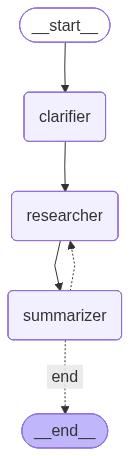

Graph structure:
START → clarifier → researcher → summarizer → END
           ↑            ↓
           └─(if <3 papers)


In [6]:
from IPython.display import Image, display
    
# Generate graph visualization as PNG
display(Image(graph.get_graph().draw_mermaid_png()))
print("Graph structure:")
print("START → clarifier → researcher → summarizer → END")
print("           ↑            ↓")
print("           └─(if <3 papers)")

## Tests

### Test 1: Simple Research Query

In [ ]:
from langchain_core.messages import HumanMessage

# Configuration for this run (needed for memory/checkpointing)
config = {"configurable": {"thread_id": "demo-thread-1"}}

question = "What are the key innovations in transformer architectures?"

# Provide required fields directly in state (no nested 'config' dict)
initial_state = {
    "query": question,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}

print("Starting agent graph execution...\n")

# Invoke the graph
result = graph.invoke(initial_state, config=config)
result

Starting agent graph execution...



2025-11-16 12:13:46,214 - INFO - Clarifying query: 'What are the key innovations in transformer architectures?'
2025-11-16 12:13:46,226 - INFO - Refined query: 'transformer architecture innovations attention variants positional encodings'
2025-11-16 12:13:46,228 - INFO - Searching ArXiv: 'transformer architecture innovations attention variants positional encodings' (iteration 0)
2025-11-16 12:13:46,231 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=transformer+architecture+innovations+attention+variants+positional+encodings&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=5


5 max_papers
max_results tool 5


2025-11-16 12:13:46,847 - INFO - Got first page: 5 of 577858 total results
2025-11-16 12:13:46,852 - INFO - Found 5 papers
2025-11-16 12:13:46,854 - INFO - Scoring paper relevance...
2025-11-16 12:13:46,859 - INFO -   📄 Dilated Neighborhood Attention Transformer... - Score: 60
2025-11-16 12:13:46,864 - INFO -   📄 Trading with the Momentum Transformer: An Intelligent and In... - Score: 35
2025-11-16 12:13:46,867 - INFO -   📄 Dalorex: A Data-Local Program Execution and Architecture for... - Score: 2
2025-11-16 12:13:46,871 - INFO -   📄 Architectural Implications of Graph Neural Networks... - Score: 5
2025-11-16 12:13:46,873 - INFO -   📄 Mask-Attention-Free Transformer for 3D Instance Segmentation... - Score: 35
2025-11-16 12:13:46,876 - INFO - 📝 Synthesizing 5 papers...
2025-11-16 12:13:46,879 - INFO - ✅ Summary generated


{'summary': '## Résumé\n• Point 1 — Localized and dilated attention improves vision transformers by keeping attention computation tractable while enlarging receptive fields: Dilated Neighborhood Attention restricts attention to local neighborhoods but uses dilation to capture wider context, enabling hierarchical vision transformers to scale with lower compute and memory than full self-attention. This yields better integration into existing vision pipelines and improved efficiency on visual tasks [Paper 1].\n\n• Point 2 — Attention applied to time series can replace sequential RNNs with more interpretable, globally connected models: The Momentum Transformer provides direct access to all past timesteps, models momentum-like dynamics, and offers improved predictive performance and interpretability for trading/time-series tasks compared with LSTMs and classical strategies. This shows transformer attention’s strength at capturing long-range dependencies in non‑vision modalities [Paper 2].\n

2025-11-16 12:13:46,994 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=dilated+neighborhood+attention+hierarchical+vision+transformers+efficiency&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=5
2025-11-16 12:13:47,602 - INFO - Got first page: 5 of 627815 total results
2025-11-16 12:13:47,689 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=quantum+machine+learning+protein+folding+NISQ+hybrid+variational&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=5
2025-11-16 12:13:48,804 - INFO - Got first page: 5 of 1017964 total results
2025-11-16 12:13:48,903 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=Attention+mechanisms+survey+self-attention+transformers&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=5
2025-11-16 12:13:49,399 - INFO - Got first page: 5 of 501174 total results
2025-11-16 

In [8]:
# Display results
print("\n" + "="*80)
print("FINAL RESULT")
print("="*80)
print(f"- Papers found: {len(result['papers'])}")
print(f"\n{result['summary']}")


FINAL RESULT
- Papers found: 5

## Résumé
• Point 1 — Localized and dilated attention improves vision transformers by keeping attention computation tractable while enlarging receptive fields: Dilated Neighborhood Attention restricts attention to local neighborhoods but uses dilation to capture wider context, enabling hierarchical vision transformers to scale with lower compute and memory than full self-attention. This yields better integration into existing vision pipelines and improved efficiency on visual tasks [Paper 1].

• Point 2 — Attention applied to time series can replace sequential RNNs with more interpretable, globally connected models: The Momentum Transformer provides direct access to all past timesteps, models momentum-like dynamics, and offers improved predictive performance and interpretability for trading/time-series tasks compared with LSTMs and classical strategies. This shows transformer attention’s strength at capturing long-range dependencies in non‑vision modali

In [9]:
follow_up_question = "Can you give more detail regarding your first point?"

# IMPORTANT: Only pass the new query, not the full config
# The checkpointer will restore previous state (messages, papers, etc.)
follow_up_state = {
    "query": follow_up_question,
}

print("\n\nAsking follow-up question...\n")

# Use the SAME config with the same thread_id
# The checkpointer loads previous messages, papers, config automatically
follow_up_result = graph.invoke(follow_up_state, config=config)

print("\n" + "="*80)
print("FOLLOW-UP RESULT")
print("="*80)
print(f"- Papers found: {len(follow_up_result['papers'])}")
print(f"\n{follow_up_result['summary']}")

2025-11-16 12:13:46,986 - INFO - Clarifying query: 'Can you give more detail regarding your first point?'
2025-11-16 12:13:46,989 - INFO - Refined query: 'dilated neighborhood attention hierarchical vision transformers efficiency'
2025-11-16 12:13:46,993 - INFO - Searching ArXiv: 'dilated neighborhood attention hierarchical vision transformers efficiency' (iteration 0)




Asking follow-up question...

5 max_papers
max_results tool 5


2025-11-16 12:13:47,608 - INFO - Found 5 papers
2025-11-16 12:13:47,609 - INFO - Scoring paper relevance...
2025-11-16 12:13:47,616 - INFO -   📄 Dilated Neighborhood Attention Transformer... - Score: 90
2025-11-16 12:13:47,620 - INFO -   📄 Vision Transformer with Quadrangle Attention... - Score: 10
2025-11-16 12:13:47,622 - INFO -   📄 PatchRot: A Self-Supervised Technique for Training Vision Tr... - Score: 90
2025-11-16 12:13:47,624 - INFO -   📄 Vision Transformer with Cross-attention by Temporal Shift fo... - Score: 85
2025-11-16 12:13:47,626 - INFO -   📄 Attention Guided CAM: Visual Explanations of Vision Transfor... - Score: 100
2025-11-16 12:13:47,632 - INFO - 📝 Synthesizing 9 papers...
2025-11-16 12:13:47,635 - INFO - ✅ Summary generated



FOLLOW-UP RESULT
- Papers found: 9

## Résumé
• Attention-guided CAMs adapt ViT self-attention to produce class-localization heatmaps by extracting and aggregating attention weights across layers and heads, then projecting that aggregated attention back to image space. In practice one computes per-head attention maps, applies head- and layer-weighting or attention-rollout to estimate token-to-token relevance, and upsamples the resulting relevance to pixels to get a visualization; this typically yields improved localization versus naïve gradient-based CAMs but depends on head selection and aggregation heuristics [Paper 1, Paper 2].  
• Localized and dilated neighborhood attention mechanisms reduce compute and enlarge effective receptive fields by restricting attention to spatial neighborhoods or using dilated patterns, which preserves long-range context with lower cost — useful both for efficiency and for producing attention maps that reflect multi-scale object structure [Paper 2, Pape

### Test 2: Query with Few Results (Triggers Loop)

In [10]:
result.keys()

dict_keys(['summary', 'papers', 'messages'])

In [11]:
from langchain_core.messages import HumanMessage

# Configuration for this run (needed for memory/checkpointing)
config = {"configurable": {"thread_id": "demo-thread-1"}}

question = "quantum machine learning for protein folding using NISQ devices"

initial_state = {
    "query": question,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}

print("Starting agent graph execution...\n")

# Invoke the graph
result = graph.invoke(initial_state, config=config)

# Display results
print("\n" + "="*80)
print("FINAL RESULT")
print("="*80)
print(f"- Papers found: {len(result['papers'])}")
print(f"\n{result['summary']}")

2025-11-16 12:13:47,683 - INFO - Clarifying query: 'quantum machine learning for protein folding using NISQ devices'
2025-11-16 12:13:47,685 - INFO - Refined query: 'quantum machine learning protein folding NISQ hybrid variational'
2025-11-16 12:13:47,688 - INFO - Searching ArXiv: 'quantum machine learning protein folding NISQ hybrid variational' (iteration 0)


Starting agent graph execution...

5 max_papers
max_results tool 5


2025-11-16 12:13:48,806 - INFO - Found 5 papers
2025-11-16 12:13:48,807 - INFO - Scoring paper relevance...
2025-11-16 12:13:48,812 - INFO -   📄 Generalization Error Bound for Quantum Machine Learning in N... - Score: 70
2025-11-16 12:13:48,816 - INFO -   📄 Changing Data Sources in the Age of Machine Learning for Off... - Score: 1
2025-11-16 12:13:48,818 - INFO -   📄 DOME: Recommendations for supervised machine learning valida... - Score: 10
2025-11-16 12:13:48,820 - INFO -   📄 Discrete molecular dynamics studies of the folding of a prot... - Score: 5
2025-11-16 12:13:48,822 - INFO -   📄 Learning Curves for Decision Making in Supervised Machine Le... - Score: 5
2025-11-16 12:13:48,826 - INFO - 📝 Synthesizing 10 papers...
2025-11-16 12:13:48,829 - INFO - ✅ Summary generated



FINAL RESULT
- Papers found: 10

## Résumé
• Les limites et opportunités du QML en NISQ : les dispositifs NISQ imposent des contraintes fortes (nombre de qubits, profondeur de circuit, bruit) qui affectent la généralisation et la complexité d’apprentissage ; une analyse des bornes d’erreur de généralisation est donc essentielle pour évaluer la viabilité des modèles quantiques pour le repliement de protéines [Paper 5].  
• Tirer parti des architectures classiques comme modèles : les protéines se prêtent naturellement à des représentations en graphe et à des mécanismes d’attention pour capturer les interactions à longue portée ; les résultats et principes d’architecture des GNN et des transformers peuvent guider la conception d’encodages quantiques et d’ansätze variationnels hybrides adaptés aux NISQ [Paper 10, Paper 2].  
• Apprentissage auto-supervisé et interprétabilité pour peu de labels : les techniques auto-supervisées et les méthodes d’interprétation de l’attention réduisent la d

In [12]:
list(graph.get_state_history(config))

[StateSnapshot(values={'query': 'quantum machine learning for protein folding using NISQ devices', 'llm_model': 'gpt-5-mini', 'llm_temperature': 0, 'max_papers': 5, 'max_iterations': 2, 'summary': '## Résumé\n• Les limites et opportunités du QML en NISQ : les dispositifs NISQ imposent des contraintes fortes (nombre de qubits, profondeur de circuit, bruit) qui affectent la généralisation et la complexité d’apprentissage ; une analyse des bornes d’erreur de généralisation est donc essentielle pour évaluer la viabilité des modèles quantiques pour le repliement de protéines [Paper 5].  \n• Tirer parti des architectures classiques comme modèles : les protéines se prêtent naturellement à des représentations en graphe et à des mécanismes d’attention pour capturer les interactions à longue portée ; les résultats et principes d’architecture des GNN et des transformers peuvent guider la conception d’encodages quantiques et d’ansätze variationnels hybrides adaptés aux NISQ [Paper 10, Paper 2].  \

### Test 3: Memory Demonstration

In [13]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "demo-thread-3"}}

# First query
question1 = "Explain attention mechanisms"
result1 = graph.invoke({
    "query": question1,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}, config=config)

print(f"✅ First query completed - {len(result1['messages'])} messages in memory")

# Second query (same thread, memory persists automatically via checkpointer)
question2 = "What about self-attention?"
result2 = graph.invoke({
    "query": question2,
    "llm_model": LLM_MODEL,
    "llm_temperature": 0,
    "max_papers": 5,
    "max_iterations": 2,
}, config=config)

print(f"✅ Second query completed - {len(result2['messages'])} messages in memory")

# Display message history
print("\n📜 Message History:")
for i, msg in enumerate(result2['messages'][-5:], 1):  # Show last 5 messages
    msg_type = msg.__class__.__name__
    name = getattr(msg, 'name', 'Unknown')
    content_preview = msg.content[:100] + "..." if len(msg.content) > 80 else msg.content
    print(f"  {i}. [{msg_type}] {name}: {content_preview}")

2025-11-16 12:13:48,898 - INFO - Clarifying query: 'Explain attention mechanisms'
2025-11-16 12:13:48,901 - INFO - Refined query: 'Attention mechanisms survey self-attention transformers'
2025-11-16 12:13:48,902 - INFO - Searching ArXiv: 'Attention mechanisms survey self-attention transformers' (iteration 0)


5 max_papers
max_results tool 5


2025-11-16 12:13:49,401 - INFO - Found 5 papers
2025-11-16 12:13:49,403 - INFO - Scoring paper relevance...
2025-11-16 12:13:49,410 - INFO -   📄 Primal-Attention: Self-attention through Asymmetric Kernel S... - Score: 90
2025-11-16 12:13:49,411 - INFO -   📄 Toward Interpretable Music Tagging with Self-Attention... - Score: 60
2025-11-16 12:13:49,413 - INFO -   📄 Attention Guided CAM: Visual Explanations of Vision Transfor... - Score: 40
2025-11-16 12:13:49,415 - INFO -   📄 Beyond Self-attention: External Attention using Two Linear L... - Score: 90
2025-11-16 12:13:49,417 - INFO -   📄 Déjà vu: A Contextualized Temporal Attention Mechanism for S... - Score: 35
2025-11-16 12:13:49,419 - INFO - 📝 Synthesizing 5 papers...
2025-11-16 12:13:49,421 - INFO - ✅ Summary generated
2025-11-16 12:13:49,428 - INFO - Clarifying query: 'What about self-attention?'


✅ First query completed - 4 messages in memory


2025-11-16 12:13:53,453 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-16 12:13:53,485 - INFO - Refined query: 'self-attention transformers survey theory efficiency'
2025-11-16 12:13:53,491 - INFO - Searching ArXiv: 'self-attention transformers survey theory efficiency' (iteration 0)


5 max_papers
max_results tool 5


2025-11-16 12:13:54,293 - INFO - Found 5 papers
2025-11-16 12:13:54,296 - INFO - Scoring paper relevance...
2025-11-16 12:13:54,304 - INFO -   📄 Attention Guided CAM: Visual Explanations of Vision Transfor... - Score: 90
2025-11-16 12:13:54,308 - INFO -   📄 Primal-Attention: Self-attention through Asymmetric Kernel S... - Score: 95
2025-11-16 12:13:54,311 - INFO -   📄 Toward Interpretable Music Tagging with Self-Attention... - Score: 80
2025-11-16 12:13:56,002 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-16 12:13:56,011 - INFO -   📄 A rich bounty of AGN in the 9 square degree Bootes survey: h... - Score: 1
2025-11-16 12:13:58,501 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-16 12:13:58,513 - INFO -   📄 Variational Approach to Quantum Field Theory: Gaussian Appro... - Score: 1
2025-11-16 12:13:58,521 - INFO - 📝 Synthesizing 7 papers...
2025-11-16 12:14:23,091 - INFO - HTTP Request: PO

✅ Second query completed - 4 messages in memory

📜 Message History:
  1. [SystemMessage] None: The conversation highlighted the role of self-attention in neural networks, which allows models to w...
  2. [AIMessage] Clarifier: Refined query: self-attention transformers survey theory efficiency
  3. [AIMessage] Researcher: Found 5 papers on ArXiv for query: self-attention transformers survey theory efficiency...
  4. [AIMessage] Summarizer: ## Résumé
• Self-attention can be cast and optimized as an asymmetric kernel machine: Primal-Attenti...


### Test 4: Cache

In [14]:
from langchain_openai import ChatOpenAI
from langchain_community.cache import InMemoryCache
import time

from langchain_core.globals import set_llm_cache
set_llm_cache(InMemoryCache())

llm = ChatOpenAI(model=LLM_MODEL, temperature=0)

question = "What is a CNN?"

# First call - hits the LLM (slow)
print("First call:")
start = time.time()
response1 = llm.invoke(question)
time1 = time.time() - start
print(f"Response: {response1.content[:100]}...")
print(f"⏱️  Time: {time1:.3f}s\n")

# Second call - returns from cache (fast!)
print("Second call (cache HIT):")
start = time.time()
response2 = llm.invoke(question)
time2 = time.time() - start
print(f"Response: {response2.content[:100]}...")
print(f"⏱️  Time: {time2:.3f}s\n")

# Compare
if time2 < time1 * 0.1:  # Cache should be 10x+ faster
    print(f"✅ Cache working! Speedup: {time1/time2:.1f}x faster")
else:
    print(f"❌ Cache might not be working")

First call:


2025-11-16 12:14:35,936 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Response: Do you mean a convolutional neural network (CNN) used in machine learning, or CNN as in the news net...
⏱️  Time: 11.225s

Second call (cache HIT):
Response: Do you mean a convolutional neural network (CNN) used in machine learning, or CNN as in the news net...
⏱️  Time: 0.002s

✅ Cache working! Speedup: 7218.8x faster


## View Results in LangSmith Studio

### Option 1: View Past Runs (Tracing)

If you have `LANGCHAIN_TRACING_V2=true` in your `.env`:
1. Go to https://smith.langchain.com
2. Navigate to your project (e.g., "scientific-graph-agent")
3. Click on any run to see:
   - Full execution trace
   - Each node's input/output
   - LLM calls and tokens used
   - Execution time per node

### Option 2: Interactive Studio (Live Development)

To interact with your graph in real-time:

```bash
# In your terminal, run:
langgraph dev

# This will open in browser:
# https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
```

The Studio provides:
- **Visual graph editor** - See your nodes and edges
- **Interactive chat** - Test queries in real-time
- **State inspector** - View state after each node
- **Thread history** - Browse past conversations by thread_id
- **Debugger** - Step through execution node by node

**Quick Setup for Studio:**

1. Ensure `langgraph.json` exists in project root
2. Start the server: `langgraph dev`
3. Open https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
4. Click "New Thread" and type your question
5. Watch the graph execute in real-time!
